In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import RMSprop, SGD, Adam
from tensorflow.keras import regularizers

C:\g\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#Aquí coloco algunos parámetros importantes
learning_rate = 0.001
epochs = 8
batch_size = 120

In [3]:
#Se descarga la base de datos con las imágenes de los dígitos
dataset = mnist.load_data()

11490434/11490434 [==============================] - 7s 1us/step


In [20]:
#La base de datos se convierte en una lista
dat = dataset

#Imprimimos el tamaño de la lista dat
print(len(dat))

#La 1ra lista de la primera lista en al lista dat tiene 60k imágenes de 28x28 pixeles "x" (train)
#La 2da lista de la primera lista en la lista dat tiene respuestas (dígitos) "y" 
print(dat[0][0].shape, dat[0][1].shape)

#La 1ra lista de la segunda lista en al lista dat tiene 10k imágenes de 28x28 pixeles "x" (test)
#La 2da lista de la segunda lista en la lista dat tiene respuestas (dígitos) "y"
print(dat[1][0].shape, dat[1][1].shape)

#Se hacen entontonces esas respectivas listas con nuevos nombres
(x_train, y_train), (x_test, y_test) = dataset

2
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


8


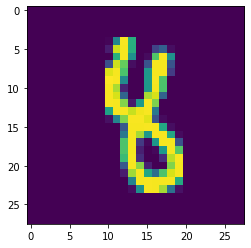

In [22]:
import matplotlib.pyplot as plt

#Aquí se usa el comando plt.imshow() para mostrar la imagen 70000
plt.imshow(dat[0][0][7000])
print(y_train[7000])

In [23]:
#se transforma cada una de las listas en una "imagen aplanada", en un vector
#se usa el comando "nombre".reshape("num de imagenes", "tamaño del vector")
x_trainv = x_train.reshape(60000, 784)
x_testv = x_test.reshape(10000, 784)

#Aquí se convierten a números de punto flotante 32 dígitos 
x_trainv = x_trainv.astype('float32')
x_testv = x_testv.astype('float32')

#ahora es posible normarlizarlos para obtener solo números del 0 al 1
x_trainv /= 255  
x_testv /= 255

In [24]:
#Se crean las 10 clases distintas posibles a obtener (0,1,2,3,4,5,6,7,8,9)
num_classes=10

#Se le asigna un "vector binario" a cada clase para los los datos y de train y test
y_trainc = keras.utils.to_categorical(y_train, num_classes)
y_testc = keras.utils.to_categorical(y_test, num_classes)

print(y_train[0], y_trainc[0])

5 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [25]:
#AQUÍ SE IMPLEMENTA LA RED NEURONAL, EL MODELO

#El modelo que se usará será secuencial, en capas apiladas una tras otra
model = Sequential()

#Definimos la primera capa Densa con 512 neuronas, función de activación sigmoide y 784 inputs (de las neronas de entrada)
model.add(Dense(30, activation='sigmoid', input_shape=(784,)))

#Definimos la segunda capa Densa con 10 clases solamente y función de activación sigmoide
model.add(Dense(num_classes, activation='sigmoid'))

#Imprimimos un resumen de la red que se está usando
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                23550     
                                                                 
 dense_1 (Dense)             (None, 10)                310       
                                                                 
Total params: 23860 (93.20 KB)
Trainable params: 23860 (93.20 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
#Model.compile se utiliza para configurar la etapa de compilación de un modelo de red neuronal antes de entrenarlo.
#Se coloca la función de costo, categorical_crossentropy para más de 2 clases o binary_crossentropy para 2 clases
#Se coloca el optimizador, SGD, Adam, RSProp con su tasa de aprendizaje ya definida
#Las métricas son medidas que se utilizan para evaluar el rendimiento del modelo durante el entrenamiento y la evaluación. 
#Puedes especificar una lista de métricas que deseas calcular, como precisión ('accuracy') o pérdida ('loss'). 

model.compile(loss='categorical_crossentropy',optimizer = Adam(learning_rate=learning_rate),metrics=['accuracy'])

#Aquí entrenamos ya a la red, insertamos el vector de entrenamiento de cada imagen con su resultado y de entrenamiento 
#Colocamos el tamaño del minibatch
#El número de épocas
#Si se mostrará el progreso o no
#Por último los datos de prueba, las entradas y salida para verificar la eficiencia etc.
history = model.fit(x_trainv, y_trainc,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_testv, y_testc)
                    )

Epoch 1/8
500/500 [==============================] - 1s 1ms/step - loss: 0.8647 - accuracy: 0.8335 - val_loss: 0.4613 - val_accuracy: 0.8982
Epoch 2/8
500/500 [==============================] - 0s 937us/step - loss: 0.3863 - accuracy: 0.9044 - val_loss: 0.3214 - val_accuracy: 0.9162
Epoch 3/8
500/500 [==============================] - 0s 966us/step - loss: 0.2973 - accuracy: 0.9214 - val_loss: 0.2700 - val_accuracy: 0.9277
Epoch 4/8
500/500 [==============================] - 0s 928us/step - loss: 0.2543 - accuracy: 0.9304 - val_loss: 0.2395 - val_accuracy: 0.9333
Epoch 5/8
500/500 [==============================] - 0s 916us/step - loss: 0.2263 - accuracy: 0.9376 - val_loss: 0.2173 - val_accuracy: 0.9383
Epoch 6/8
500/500 [==============================] - 0s 931us/step - loss: 0.2053 - accuracy: 0.9431 - val_loss: 0.2022 - val_accuracy: 0.9421
Epoch 7/8
500/500 [==============================] - 0s 921us/step - loss: 0.1894 - accuracy: 0.9476 - val_loss: 0.1894 - val_accuracy: 0.9461
E

313/313 [==============================] - 0s 609us/step - loss: 0.1805 - accuracy: 0.9479
eficiencia: [0.18045905232429504, 0.9478999972343445]
313/313 [==============================] - 0s 590us/step
forma del la lista de predicción: (10000, 10)
la predicción de la foto 1 es en probilidades: [0.28289902 0.644375   0.997186   0.6593114  0.00192324 0.320461
 0.72896093 0.01629706 0.39734834 0.00538291]
resultado correcto:
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
resultado real: 2


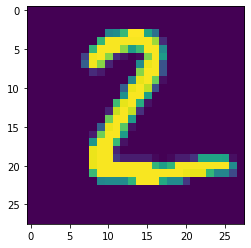

In [29]:
#Se evalua la eficiencia del modelo
score = model.evaluate(x_testv, y_testc, verbose=1) 
print("eficiencia:", score)

#Hacemos una predicción de la red entrenada usando los datos de prueba
a = model.predict(x_testv) 
#a es una lista de listas la cual su primer lista es de 10000 elementos y la segunda lista tiene 10
#es decir, las 10000 imagenes de prueba y su correspondiente predicción binaria
print("forma del la lista de predicción:", a.shape)


print("la predicción de la foto 1 es en probilidades:", a[1])
print("resultado correcto:")
print(y_testc[1])

#imprimimos la foto 1
plt.imshow(x_test[1])
#imprimimos su resultado real
print("resultado real:", y_test[1])